In [ ]:
!nvidia-smi

Mon Nov 27 15:55:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

2.1.0+cu118


# Introduction to Tensors

**Tensors**

In [ ]:
#Scalars
scalar = torch.tensor(7) #Creating a tensor
scalar

tensor(7)

In [ ]:
scalar.ndim #number of dimension

0

In [ ]:
#Get back tensor as python datatype
scalar.item()

7

In [ ]:
#vector
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [ ]:
vector.ndim

1

In [ ]:
vector.shape

torch.Size([2])

In [ ]:
#MATRIX
MATRIX = torch.tensor([[7,8],[9,10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
MATRIX.ndim

2

In [ ]:
MATRIX[0]

tensor([7, 8])

In [ ]:
MATRIX.shape

torch.Size([2, 2])

In [ ]:
#TENSOR
TENSOR = torch.tensor([[[1,2,3],[3,6,9],[2,4,5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [ ]:
TENSOR.ndim

3

In [ ]:
TENSOR.shape

torch.Size([1, 3, 3])

In [ ]:
TENSOR[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

### Random Tensors

In [ ]:
#Create a random tensor of size (3,4)
random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.1378, 0.9311, 0.8297, 0.2580],
        [0.9834, 0.8472, 0.5090, 0.4402],
        [0.5556, 0.4815, 0.8115, 0.4170]])

In [ ]:
random_tensor.ndim

2

In [ ]:
#Create a random tensor of size (224,224,3)
random_image_size_tensor = torch.rand(size=(224,224,3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

### Zeroes and ones

In [ ]:
#Create a tensor of all zeroes
zeros = torch.zeros(size=(3,4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

In [ ]:
#Create a tensor of all ones
ones = torch.ones(size=(3,4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

###Creating a range and tensors

In [ ]:
zero_to_ten_deprecated = torch.range(0,10)

#Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

<ipython-input-23-f71dc6ceb454>:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  zero_to_ten_deprecated = torch.range(0,10)


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
zero_to_ten_deprecated

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

###Getting information from tensors

In [ ]:
example = torch.rand(3,4)

print(example)
print("Shape of tensor:",example.shape)
print("Datatype of tensor:",example.dtype)
print("Device tensor is stored on:",example.device)

tensor([[0.8760, 0.5014, 0.7127, 0.5647],
        [0.5035, 0.3989, 0.7331, 0.2021],
        [0.9497, 0.4946, 0.9836, 0.3651]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


###Basic Operations

In [ ]:
#addition
add = torch.tensor([10,9,7,4])
add + 10

tensor([20, 19, 17, 14])

In [ ]:
#multiple
add*10

tensor([100,  90,  70,  40])

In [ ]:
add

tensor([10,  9,  7,  4])

In [ ]:
add = add-10
add

tensor([ 0, -1, -3, -6])

In [ ]:
torch.multiply(add,10)

tensor([  0, -10, -30, -60])

In [ ]:
add * add

tensor([ 0,  1,  9, 36])

###Matrix Multiplication

In [ ]:
torch.matmul(add,add)

tensor(46)

In [ ]:
A = torch.tensor([[1,2],[3,4],[5,6]],dtype=torch.float32)
B = torch.tensor([[3,2,4],[6,3,4]],dtype=torch.float32)
A @ B #Matrix Multiplication

tensor([[15.,  8., 12.],
        [33., 18., 28.],
        [51., 28., 44.]])

In [ ]:
print(B.T)

tensor([[3., 6.],
        [2., 3.],
        [4., 4.]])


In [ ]:
#Linear Network
#y = x*(A.T)+b
#Since linear layer starts with a random weights matrix , lets make it reproducible
torch.manual_seed(42)

linear = torch.nn.Linear(in_features=2, out_features=6)
k = A
output = linear(k)

print(k.shape)
print(output)
print(output.shape)

torch.Size([3, 2])
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)
torch.Size([3, 6])


###Finding the min,max,mean,sum,etc

In [ ]:
cat = torch.tensor([14,5,9,6])
cat

tensor([14,  5,  9,  6])

In [ ]:
print(cat.max())
print(cat.min())
print(cat.type(torch.float32).mean())
print(cat.sum())

tensor(14)
tensor(5)
tensor(8.5000)
tensor(34)


In [ ]:
#positional max and min
print(cat.argmax())
print(cat.argmin())

tensor(0)
tensor(1)


In [ ]:
cat.type(torch.float16)

tensor([14.,  5.,  9.,  6.], dtype=torch.float16)

In [ ]:
cat

tensor([14,  5,  9,  6])

In [ ]:
#permute
print(k.shape)
k_permuted = k.permute(1,0)
print(k_permuted.shape)

torch.Size([3, 2])
torch.Size([2, 3])


###Reproducibility

To reduce the randomness in NN and pytorch comes the concept of a random seed.
Essentially what the random seed does is "flavour" the randomness.

In [ ]:
import torch

#create two random tensors

random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)
print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.9710, 0.3673, 0.1011, 0.1031],
        [0.0958, 0.1313, 0.9256, 0.0076],
        [0.2588, 0.5404, 0.2330, 0.4886]])
tensor([[0.1090, 0.3526, 0.8802, 0.0517],
        [0.0492, 0.4068, 0.6442, 0.7940],
        [0.7219, 0.8877, 0.3089, 0.2780]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
#Let's make some random but reproducible tensors
import torch

#Set the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)
torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4)
print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


Extra Resorces for reproducibility:

---
https://pytorch.org/docs/stable/notes/randomness.html

https://en.wikipedia.org/wiki/Random_seed

###Running tensors on GPUs

In [ ]:
#Check for GPU
import torch
torch.cuda.is_available()

True

In [ ]:
#Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
#Count number of devices
torch.cuda.device_count()

1

In [ ]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

In [ ]:
# gpu tensor can't be converted in numpy array
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])


The above returns a copy of the GPU tensor in CPU memory so the original tensor is still on GPU

In [ ]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

--Shaahid Ahmed N

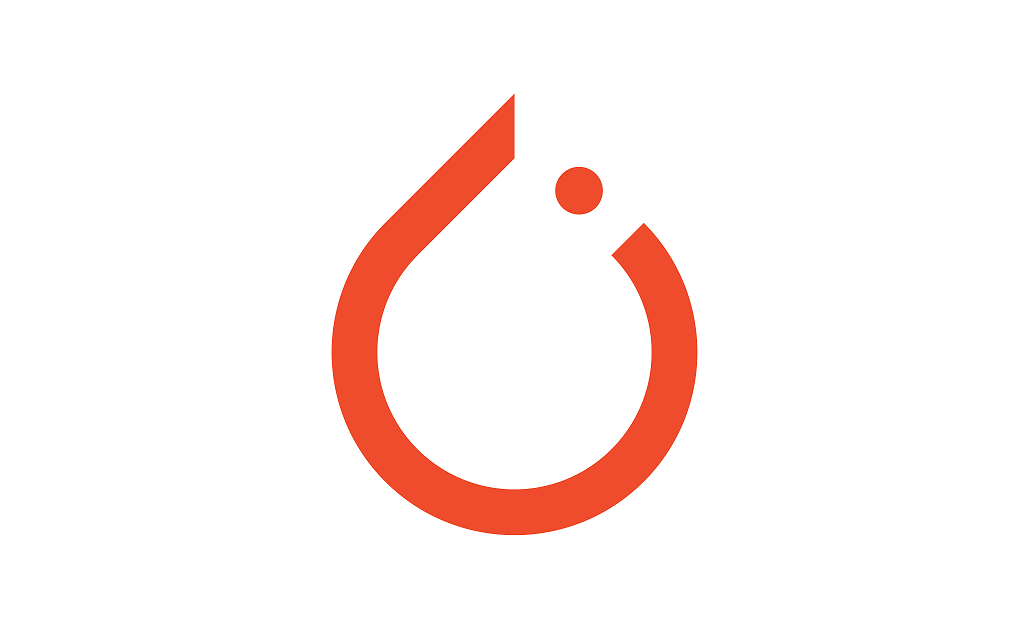